# La regresión logística 
es un algoritmo de aprendizaje automático supervisado que se utiliza principalmente para tareas de clasificación en las que el objetivo es predecir la probabilidad de que una instancia pertenezca o no a una clase determinada. Es un tipo de algoritmo estadístico que analiza la relación entre un conjunto de variables independientes y las variables binarias dependientes. Es una potente herramienta para la toma de decisiones. Por ejemplo, correo electrónico spam o no. 

## Regresión logística
La regresión logística es un algoritmo de aprendizaje automático supervisado que se utiliza principalmente para tareas de clasificación en las que el objetivo es predecir la probabilidad de que una instancia pertenezca a una clase determinada. Se utiliza para algoritmos de clasificación su nombre es regresión logística. se denomina regresión porque toma la salida de la función de regresión lineal como entrada y utiliza una función sigmoidea para estimar la probabilidad de la clase dada. La diferencia entre regresión lineal y regresión logística es que la salida de la regresión lineal es el valor continuo que puede ser cualquier cosa mientras que la regresión logística predice la probabilidad de que una instancia pertenezca o no a una clase determinada.

## Prerrequisito: Comprender la regresión logística
La regresión logística es el tipo de análisis de regresión utilizado para hallar la probabilidad de que ocurra un determinado suceso. Es el tipo de regresión más adecuado para los casos en los que tenemos una variable dependiente categórica que sólo puede tomar valores discretos. 

## El conjunto de datos : 
En este artículo, vamos a predecir si un estudiante será admitido en una universidad determinada, basándonos en sus puntuaciones en las pruebas gmat y gpa y en su experiencia laboral. La variable dependiente es una variable logística binaria, que se espera que adopte estrictamente una de las dos formas siguientes: admitido o no admitido. 

## Construcción del modelo de regresión logística :
Statsmodels es un módulo de Python que proporciona varias funciones para estimar diferentes modelos estadísticos y realizar pruebas estadísticas.  

En primer lugar, definimos el conjunto de variables dependientes (y) e independientes (X). Si la variable dependiente está en forma no numérica, primero se convierte en numérica utilizando dummies. El archivo utilizado en el ejemplo para entrenar el modelo puede descargarse aquí: https://drive.google.com/file/d/1g4Ib_zuG_hJG6VWlXvqANti69w5cM66K/view?usp=sharing.

Statsmodels proporciona una función Logit() para realizar la regresión logística. La función Logit() acepta y y X como parámetros y devuelve el objeto Logit. A continuación, el modelo se ajusta a los datos.

In [45]:
# importing libraries
import statsmodels.api as sm
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# loading the training dataset 
df = pd.read_csv('logit_train1.csv', index_col = 0)

In [46]:
df

,gmat,gpa,work_experience,admitted
16,580,2.7,4,0
33,660,3.3,6,1
8,740,3.3,5,1
38,590,1.7,4,0
32,660,4.0,4,1
18,540,2.7,2,0
6,690,2.3,1,0
23,550,2.7,1,0
27,580,2.3,2,0
31,620,2.7,2,0


In [47]:
print("Tengo ",len(df),"datos")

Tengo  30 datos


In [48]:
#Saber las columnas que tengo
df.columns

Index(['gmat', 'gpa', 'work_experience', 'admitted'], dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 16 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             30 non-null     int64  
 1   gpa              30 non-null     float64
 2   work_experience  30 non-null     int64  
 3   admitted         30 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [50]:
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [51]:
# Saber algunos estadísticos descriptivos
df.describe()

,gmat,gpa,work_experience,admitted
count,30.000000,30.000000,30.000000,30.000000
mean,650.000000,3.150000,3.666667,0.500000
std,63.734363,0.664234,1.667816,0.508548
min,540.000000,1.700000,1.000000,0.000000
25%,590.000000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.500000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


array([[<AxesSubplot:title={'center':'gmat'}>,
        <AxesSubplot:title={'center':'gpa'}>],
       [<AxesSubplot:title={'center':'work_experience'}>,
        <AxesSubplot:title={'center':'admitted'}>]], dtype=object)

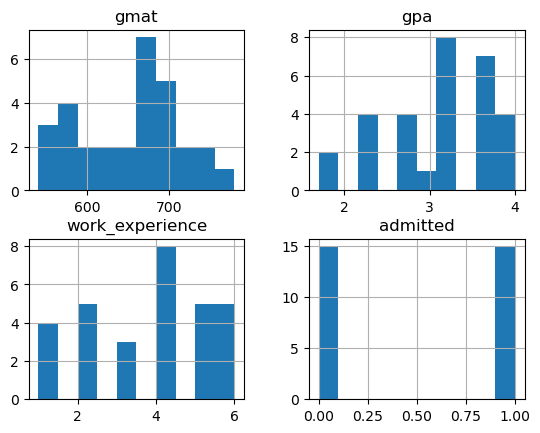

In [52]:
df.hist()

In [53]:
df["admitted"].value_counts()

admitted
0    15
1    15
Name: count, dtype: int64

In [54]:
#Correlaciones
df.corr()

,gmat,gpa,work_experience,admitted
gmat,1.000000,0.570171,0.408743,0.606417
gpa,0.570171,1.000000,0.529154,0.719678
work_experience,0.408743,0.529154,1.000000,0.691148
admitted,0.606417,0.719678,0.691148,1.000000


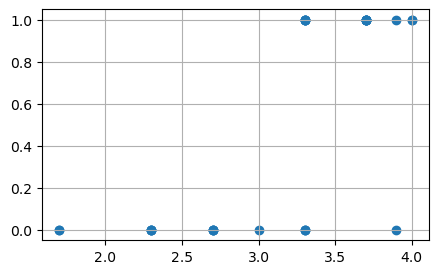

In [55]:
#Graficas
plt.figure(figsize=(5,3))
plt.scatter(df["gpa"],df["admitted"])
plt.grid()

In [56]:
# defining the dependent and independent variables
Xtrain = df[['gmat', 'gpa', 'work_experience']]
ytrain = df[['admitted']]

In [57]:
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.352707
         Iterations 8


## La tabla resumen :
El siguiente cuadro sinóptico nos ofrece un resumen descriptivo de los resultados de la regresión.

In [58]:
# printing the summary table
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            2
Date:                Wed, 28 Jun 2023   Pseudo R-squ.:                  0.4912
Time:                        19:50:11   Log-Likelihood:                -10.581
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 3.668e-05
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gmat               -0.0262      0.011     -2.383      0.017      -0.048      -0.005
gpa                 3.9422      1.964      2.007      0.045       0.092       7.792
work_experience     1.1983      0.482      2.487      0.013       0.254       2.143
===================================================================================
"""

## Modelo acá:
$$Y \sim A_1(GMAT)+A_2(GPA)+A_3(WORK_EXPERIENCE)$$

#predicción
GMAT=600, GPA=3, WE=1

In [59]:
y_predi=(-0.0262*600)+(3.9422*3)+(1.1983*1)
print(y_predi)

-2.6951


In [60]:
log_reg.predict([600,3,1])

array([0.06445861])

In [61]:
prediction=np.round(log_reg.predict(Xtrain))

In [62]:
prediction

16    1.0
33    1.0
8     0.0
38    0.0
32    1.0
18    0.0
6     0.0
23    0.0
27    0.0
31    0.0
3     1.0
29    1.0
0     0.0
13    1.0
4     1.0
22    0.0
37    0.0
17    1.0
20    0.0
1     1.0
5     1.0
9     0.0
24    0.0
26    1.0
2     0.0
28    1.0
25    1.0
39    1.0
11    1.0
19    0.0
dtype: float64

In [63]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(ytrain, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytrain, prediction))

Confusion Matrix : 
 [[12  3]
 [ 3 12]]
Test accuracy =  0.8


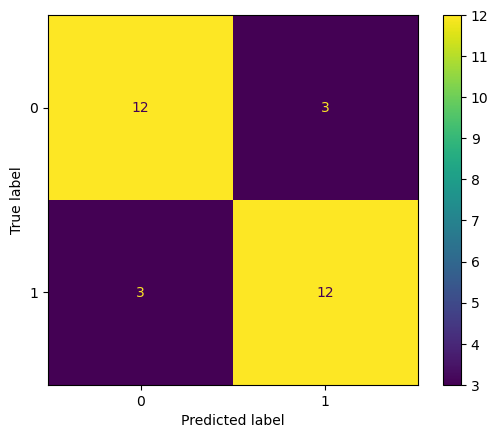

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

## Explicación de algunos términos del cuadro recapitulativo:

**coef** : los coeficientes de las variables independientes en la ecuación de regresión.
**Log-verosimilitud** : el logaritmo natural de la función de estimación de máxima verosimilitud (MLE). MLE es el proceso de optimización de encontrar el conjunto de parámetros que resultan en el mejor ajuste.
**LL-Nulo** : el valor de la log-verosimilitud del modelo cuando no se incluye ninguna variable independiente (sólo se incluye un intercepto).
**Pseudo R-cuadrado** : sustituto del valor R-cuadrado en la regresión lineal por mínimos cuadrados. Es la relación entre la log-verosimilitud del modelo nulo y la del modelo completo.

## Predicción con nuevos datos :
Ahora probaremos nuestro modelo con nuevos datos de prueba. Los datos de prueba se cargan desde este archivo csv.
La función predict() es útil para realizar predicciones. Las predicciones obtenidas son valores fraccionarios (entre 0 y 1) que denotan la probabilidad de ser admitido. Estos valores se redondean para obtener los valores discretos de 1 o 0.

In [31]:
# loading the testing dataset  
df = pd.read_csv('logit_test1.csv', index_col = 0)
  
# defining the dependent and independent variables
Xtest = df[['gmat', 'gpa', 'work_experience']]
ytest = df['admitted']
  
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
print('Actual values', list(ytest.values))
print('Predictions :', prediction)

Actual values [0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
Predictions : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


Comprobación de la precisión del modelo :

In [7]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

Confusion Matrix : 
 [[6 0]
 [2 2]]
Test accuracy =  0.8


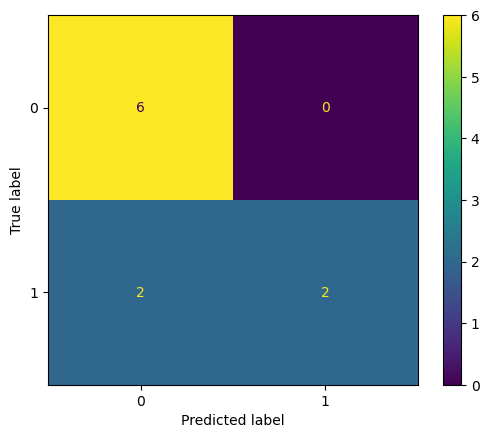

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [9]:
log_reg.predict([467,4,6])

array([0.99997831])

In [ ]:
1. Problema
2. Datos
3. Numeritos de la regresion
4. Grafico real/predic, matriz de confusión